### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Importing Os and The Location of the dataset


In [2]:
import os
os.chdir(r'C:\Users\Samuel Ephraim\Desktop\Ai Labs\Machine Learning With Python\Regression(Week 2)')

## Reading the data in


In [3]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Data Exploration

Let's first have a descriptive exploration on our data.


In [5]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


 Selecting some features to explore more.


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Plotting each of these features:


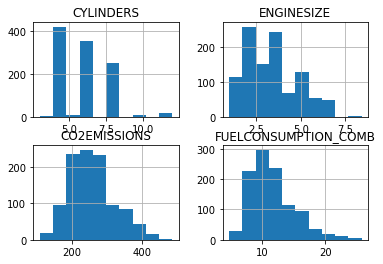

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Plotting each of these features against the CO2Emissions, to see how linear their relationship is:


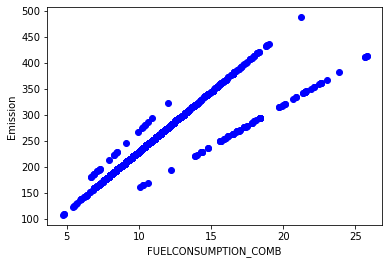

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

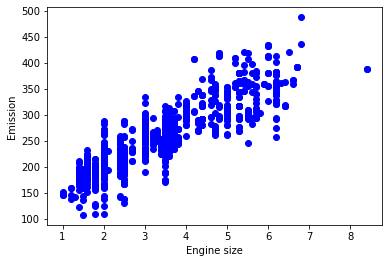

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Creating a training and testing dataset

Train/Test Split involves dividing the dataset into mutually exclusive training and testing sets. The training set is then used to train, and the testing set is used to test.
Because the testing dataset is not part of the dataset used to train the model, this will provide a more accurate evaluation of out-of-sample accuracy. As a result, we have a better understanding of how well our model generalizes to new data.

This means we know the outcome of each data point in the testing dataset, which makes it ideal for testing! Because this data was not used to train the model, the model has no idea how these data points will turn out. In essence, this is true out-of-sample testing.

Divide our dataset into train and test sets. 80% of the total dataset will be used for training, while 20% will be used for testing. Using the **np.random.rand()** function, we create a mask to select random rows:

In [10]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution


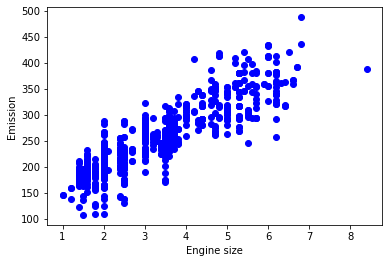

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling

Using sklearn package to model data.


In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.65422214]]
Intercept:  [123.96755431]


As previously stated, the parameters of the fit line in simple linear regression are **Coefficient** and **Intercept**.
Sklearn can estimate the intercept and slope of the line directly from our data because it is a simple linear regression with only two parameters.
It is important to note that all of the data must be available in order to traverse and calculate the parameters.

#### Plot outputs


We can plot the fit line over the data:


Text(0, 0.5, 'Emission')

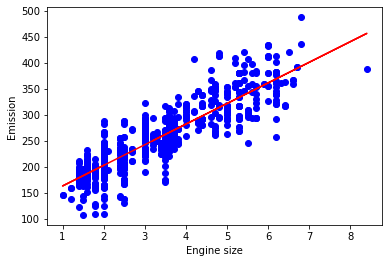

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#### Evaluation
To calculate the accuracy of a regression model, we compare the actual and predicted values. Evaluation metrics play an important role in the development of a model because they reveal areas that need to be improved.

There are various model evaluation metrics; we'll use MSE here to calculate our model's accuracy based on the test set:

* Mean Absolute Error: This is the average of the errors' absolute values. Because it is simply average error, this is the simplest of the metrics to grasp.

* Mean Squared Error (MSE): The mean of the squared error is the mean squared error (MSE). It is more popular than Mean Absolute Error because it focuses on large errors.This is because the squared term increases larger errors exponentially more than smaller ones.

* Root Mean Squared Error (RMSE).

* R-squared is a popular metric for measuring the performance of your regression model, not an error. It represents the distance between the data points and the fitted regression line. The better the model fits your data, the higher the R-squared value. The highest possible score is 1.0, but it can also be negative (because the model can be arbitrarily worse).

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 23.64
Residual sum of squares (MSE): 972.47
R2-score: 0.75


### MISC

In [15]:
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

predictions = regr.predict(test_x)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean Absolute Error: 21.43
